In [4]:
import os
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import h5py
from scipy.stats import pearsonr
import statsmodels.stats.multitest as smm
import seaborn
import pickle

In [5]:
most_expressed_transcript_idx, most_varying_feature_idx, results = pickle.load(open(GTEx_directory + '/data/quick_pvalues.py','rb'))

In [31]:
filt_mean_features = {}
with h5py.File(GTEx_directory + '/data/retrained_inceptionet_aggregations.hdf5','r') as f:
    expression = f['lung']['256']['expression'].value
    filt_expression = expression[:, most_expressed_transcript_idx]
    for s in ['128','256','512','1024','2048']:
        size_mean_features = f['lung'][s]['mean'].value
        filt_mean_features[s] = size_mean_features
        
    expression_IDs = f['lung']['256']['expression_IDs'].value

In [62]:
aggregation = 'mean'
size = 2048
largest_pvalue_pairs = np.array([np.argwhere(np.argsort(results['{}_{}_R'.format(aggregation,size)].flatten())[::-1].reshape(results['mean_2048_R'].shape) == i) for i in range(100)])


In [63]:
filt_expression.shape

(274, 5000)

In [64]:
largest_pvalue_pairs[0:10]

array([[[  28, 2930]],

       [[  87,  631]],

       [[  29, 4387]],

       [[  50,   33]],

       [[  31,  125]],

       [[  53, 2498]],

       [[  28,  387]],

       [[  56, 2173]],

       [[  64, 1788]],

       [[  84,  498]]])

In [65]:
filt_mean_features[str(size)][:]

array([[ 0.        ,  0.        ,  0.        , ...,  0.00592366,
         0.        ,  0.        ],
       [ 0.        ,  0.1343465 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.36384514,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.28622976,  0.        , ...,  1.71833122,
         0.        ,  0.        ],
       [ 0.        ,  0.12353846,  0.        , ...,  1.69510496,
         0.        ,  0.        ]], dtype=float32)

In [54]:
largest_pvalue_pairs[0][0][0]

2069

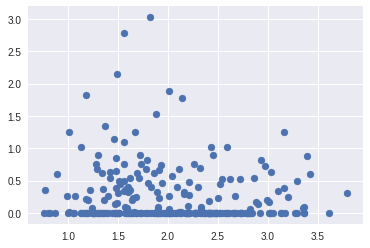

In [66]:
f = filt_mean_features[str(size)][:,largest_pvalue_pairs[0][0][0]]
t = filt_expression[:,largest_pvalue_pairs[0][0][1]]
plt.scatter(t,f)